In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
EXPORT_DIR = "exports_step1_creditmetrics_csv"
Z_hat = pd.read_csv(f"{EXPORT_DIR}/Z_hat_standardized_sector_q.csv")

In [107]:
Z_hat= Z_hat[["sector", "quarter", "z_hat"]]

In [108]:
Z_hat

,sector,quarter,z_hat
0,CONSTRUCTION & IMMOBILIER,2011-04-01,-5.316023
1,CONSTRUCTION & IMMOBILIER,2011-07-01,0.333162
2,CONSTRUCTION & IMMOBILIER,2011-10-01,0.355822
3,CONSTRUCTION & IMMOBILIER,2012-01-01,0.352408
4,CONSTRUCTION & IMMOBILIER,2012-04-01,0.350533
...,...,...,...
408,SERVICES PRO,2023-01-01,-0.044023
409,SERVICES PRO,2023-04-01,-0.042449
410,SERVICES PRO,2023-07-01,-0.048700
411,SERVICES PRO,2023-10-01,0.353738


In [109]:
# Charger le fichier Excel
df_macro_raw= pd.read_excel("data\macro_data\Données_macro_hist_v2.xlsx")

# Afficher les premières lignes
df_macro_raw

,Region,Variable,Unit,2010-Q1,2010-Q2,2010-Q3,2010-Q4,2011-Q1,2011-Q2,2011-Q3,...,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3,2024-Q4,2025-Q1
0,Argentina,Central bank Intervention rate (policy interes...,%,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,Effective exchange rate,index; 2017=100,180.006667,182.946667,181.750000,177.056667,174.323333,167.796667,169.263333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,Exchange_rate,local currency per US$,3.830000,3.880000,3.920000,3.950000,3.990000,4.060000,4.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,GDP Growth Rate,%,3.131891,4.307855,0.557817,1.184901,2.388622,1.192061,0.842933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,Central bank Intervention rate (policy interes...,%,3.833333,4.416667,4.500000,4.666667,4.750000,4.750000,4.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,United States,Inflation rate,%,2.360525,1.767765,1.175609,1.270248,2.141127,3.430395,3.756174,...,7.103384,5.810245,3.982369,3.514197,3.243513,3.240480,3.199263,2.622039,2.745114,2.737586
247,United States,Long term interest rate,%,3.716667,3.490000,2.786667,2.863333,3.460000,3.210000,2.426667,...,3.830000,3.646667,3.593333,4.150000,4.440000,4.160000,4.443333,3.946667,4.283333,4.453333
248,United States,Oil price,US$ per barrel,76.674837,78.845036,76.675000,87.033160,105.369424,117.541905,113.266948,...,88.720130,82.323613,78.086130,85.983547,82.891681,81.955714,84.981986,78.708317,74.000940,75.042781
249,United States,Unemployment rate,%,9.833333,9.633333,9.466666,9.500000,9.033334,9.066667,9.000000,...,3.566667,3.533333,3.533333,3.666667,3.800000,3.833333,4.000000,4.166667,4.133333,4.100000


In [110]:
df = df_macro_raw.copy()

id_cols = ["Region", "Variable", "Unit"]
value_cols = [c for c in df.columns if c not in id_cols]

df_long = df.melt(
    id_vars=id_cols,
    value_vars=value_cols,
    var_name="quarter",
    value_name="value"
)

df_long.head()

,Region,Variable,Unit,quarter,value
0,Argentina,Central bank Intervention rate (policy interes...,%,2010-Q1,9.500000
1,Argentina,Effective exchange rate,index; 2017=100,2010-Q1,180.006667
2,Argentina,Exchange_rate,local currency per US$,2010-Q1,3.830000
3,Argentina,GDP Growth Rate,%,2010-Q1,3.131891
4,Australia,Central bank Intervention rate (policy interes...,%,2010-Q1,3.833333


In [111]:
Z_hat

,sector,quarter,z_hat
0,CONSTRUCTION & IMMOBILIER,2011-04-01,-5.316023
1,CONSTRUCTION & IMMOBILIER,2011-07-01,0.333162
2,CONSTRUCTION & IMMOBILIER,2011-10-01,0.355822
3,CONSTRUCTION & IMMOBILIER,2012-01-01,0.352408
4,CONSTRUCTION & IMMOBILIER,2012-04-01,0.350533
...,...,...,...
408,SERVICES PRO,2023-01-01,-0.044023
409,SERVICES PRO,2023-04-01,-0.042449
410,SERVICES PRO,2023-07-01,-0.048700
411,SERVICES PRO,2023-10-01,0.353738


Nous allons récupérer les variables macroéconomiques à considérer pour la modélisation des facteurs systémiques. D'abord, au regard des données dont nous disposons, nous ne pouvons considérer que les variables provenant des régions d'EUrope (5 variables disponibles) et des US (9 variables disponibles).

In [112]:
# Sélection des régions
regions_keep = ["United States"]
df = df_macro_raw[df_macro_raw["Region"].isin(regions_keep)].copy()

In [113]:
# Colonnes temporelles
time_cols = [c for c in df.columns if "-" in c]
# On garde uniquement les lignes sans NaN sur toute la période
df = df.dropna(subset=time_cols)

In [114]:
# Mapping régions → suffixes
region_map = {
    "United States": "US"
}

def clean_var_name(var):
    return (
        var.strip()
           .replace(" ", "_")
           .replace("(", "")
           .replace(")", "")
           .replace("/", "_")
    )

df["var_name"] = (
    df["Region"].map(region_map)
    + "_"
    + df["Variable"].apply(clean_var_name)
)

In [115]:
# Passage au format long
df_long = df.melt(
    id_vars=["var_name"],
    value_vars=time_cols,
    var_name="date",
    value_name="value"
)

# Pivot final
df_ts = df_long.pivot(
    index="date",
    columns="var_name",
    values="value"
).sort_index()

In [116]:
# Conversion "2010-Q1" → PeriodIndex trimestriel
df_ts.index = pd.PeriodIndex(df_ts.index, freq="Q").to_timestamp()

In [117]:
df_ts

var_name,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,US_Inflation_rate,US_Long_term_interest_rate,US_Oil_price,US_Unemployment_rate
date,,,,,,,,,
2010-01-01,0.125000,84.740000,46.875171,0.484501,94.481014,2.360525,3.716667,76.674837,9.833333
2010-04-01,0.125000,86.106667,41.314746,0.967586,93.876843,1.767765,3.490000,78.845036,9.633333
2010-07-01,0.125000,84.923333,45.743602,0.771085,92.137491,1.175609,2.786667,76.675000,9.466666
2010-10-01,0.125000,81.390000,50.410959,0.525110,90.641295,1.270248,2.863333,87.033160,9.500000
2011-01-01,0.125000,80.343333,53.144269,-0.237205,87.908116,2.141127,3.460000,105.369424,9.033334
...,...,...,...,...,...,...,...,...,...
2024-01-01,5.375000,107.953333,210.614185,0.404802,153.875453,3.240480,4.160000,81.955714,3.833333
2024-04-01,5.375000,110.086667,218.876649,0.738980,154.462696,3.199263,4.443333,84.981986,4.000000
2024-07-01,5.208333,109.493333,230.981949,0.759510,155.181924,2.622039,3.946667,78.708317,4.166667


In [118]:
df_ts.describe()

var_name,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,US_Inflation_rate,US_Long_term_interest_rate,US_Oil_price,US_Unemployment_rate
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1.302596,94.734809,112.171217,0.594635,115.285646,2.585943,2.532678,78.335751,5.769399
std,1.767798,9.969892,53.661587,1.524271,23.970174,1.942000,0.947719,23.710626,2.225320
min,0.125000,78.926667,41.314746,-7.908965,85.850160,-0.062696,0.650000,33.377157,3.533333
25%,0.125000,83.793333,74.089245,0.404802,94.243745,1.405456,1.920000,61.479004,3.866667
50%,0.208333,96.483333,100.484015,0.673208,109.857003,2.032914,2.370000,76.674837,4.933333
75%,1.958333,100.160000,151.732314,0.852849,138.336392,3.199263,3.033333,102.572414,7.533333
max,5.375000,114.066667,235.757927,7.830225,156.414644,8.633300,4.453333,118.427965,13.000000


In [119]:
Z_hat

,sector,quarter,z_hat
0,CONSTRUCTION & IMMOBILIER,2011-04-01,-5.316023
1,CONSTRUCTION & IMMOBILIER,2011-07-01,0.333162
2,CONSTRUCTION & IMMOBILIER,2011-10-01,0.355822
3,CONSTRUCTION & IMMOBILIER,2012-01-01,0.352408
4,CONSTRUCTION & IMMOBILIER,2012-04-01,0.350533
...,...,...,...
408,SERVICES PRO,2023-01-01,-0.044023
409,SERVICES PRO,2023-04-01,-0.042449
410,SERVICES PRO,2023-07-01,-0.048700
411,SERVICES PRO,2023-10-01,0.353738


In [120]:
import numpy as np
import pandas as pd

def clean_col(x: str) -> str:
    x = str(x).strip()
    x = x.replace("&", "and").replace("/", "_")
    x = x.replace(" ", "_").replace("-", "_")
    return x

def build_macro_plus_Z_wide(
    df_ts: pd.DataFrame,
    Z_hat: pd.DataFrame,
    date_col_z: str = "quarter",        # colonne date côté Z
    sector_col_z: str = "sector",       # colonne secteur côté Z
    z_value_col: str = "z_hat",         # colonne valeur Z (z_hat / z_std / Z_group ...)
    how: str = "left",
    agg: str = "mean",                  # si doublons date/secteur : mean / median / first
    force_quarter_start: bool = True
) -> pd.DataFrame:
    """
    df_ts: macro wide, index datetime quarterly (ex: 2010-01-01, 2010-04-01, ...)
    Z_hat: long avec au moins [date_col_z, sector_col_z, z_value_col]
    """

    # 0) Copie + sécurisation index macro
    macro = df_ts.copy()
    if not isinstance(macro.index, pd.DatetimeIndex):
        macro.index = pd.to_datetime(macro.index, errors="coerce")
    macro.index = macro.index.normalize()

    # 1) Z : check colonnes
    z = Z_hat.copy()
    needed = {date_col_z, sector_col_z, z_value_col}
    missing = needed - set(z.columns)
    if missing:
        raise ValueError(f"Colonnes manquantes dans Z_hat: {missing}")

    # 2) Datetime + alignement trimestriel
    z["date_q"] = pd.to_datetime(z[date_col_z], errors="coerce").dt.normalize()
    z = z[z["date_q"].notna()].copy()

    if force_quarter_start:
        # force au début du trimestre (2010-01-01, 2010-04-01, ...)
        z["date_q"] = z["date_q"].dt.to_period("Q").dt.start_time

    # 3) Nettoyer secteurs -> noms colonnes
    z["sector_col"] = "Z_" + z[sector_col_z].apply(clean_col)

    # 4) Gérer doublons date/secteur (très fréquent après regroupements)
    #    On agrège avant pivot pour éviter les erreurs ou incohérences
    if agg == "mean":
        z_agg = z.groupby(["date_q", "sector_col"], as_index=False)[z_value_col].mean()
    elif agg == "median":
        z_agg = z.groupby(["date_q", "sector_col"], as_index=False)[z_value_col].median()
    elif agg == "first":
        z_agg = z.sort_values(["date_q"]).drop_duplicates(["date_q", "sector_col"])
        z_agg = z_agg[["date_q", "sector_col", z_value_col]]
    else:
        raise ValueError("agg doit être parmi: 'mean', 'median', 'first'")

    # 5) Pivot -> wide
    z_wide = (
        z_agg.pivot(index="date_q", columns="sector_col", values=z_value_col)
             .sort_index()
    )

    # 6) Join
    df_full = macro.join(z_wide, how=how)

    return df_full

                     # pour garder que les dates avec Z

In [121]:
df_full = build_macro_plus_Z_wide(
    df_ts=df_ts,         # macro wide, index = dates trimestrielles
    Z_hat=Z_hat,       # ton Z trimestriel
    date_col_z="quarter",
    sector_col_z="sector",
    z_value_col="z_hat",  # ou "Z_group" si c'est bien le nom
    how="left",
    agg="mean",
    force_quarter_start=True
)

# check NaN sur les Z
na_rate = df_full.filter(like="Z_").isna().mean().sort_values()
print(na_rate.head(10))
print("\nPires colonnes Z (beaucoup de NaN):")
print(na_rate.tail(10))


Z_CONSTRUCTION_and_IMMOBILIER          0.147541
Z_FINANCE                              0.147541
Z_INDUSTRIE                            0.147541
Z_INFO_COM                             0.147541
Z_PRIMAIRES_and_ÉNERGIE                0.147541
Z_PUBLIC_and_SERVICES_NON_MARCHANDS    0.147541
Z_SERVICES                             0.163934
Z_SERVICES_PRO                         0.180328
dtype: float64

Pires colonnes Z (beaucoup de NaN):
Z_CONSTRUCTION_and_IMMOBILIER          0.147541
Z_FINANCE                              0.147541
Z_INDUSTRIE                            0.147541
Z_INFO_COM                             0.147541
Z_PRIMAIRES_and_ÉNERGIE                0.147541
Z_PUBLIC_and_SERVICES_NON_MARCHANDS    0.147541
Z_SERVICES                             0.163934
Z_SERVICES_PRO                         0.180328
dtype: float64


In [122]:
df_full

,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,US_Inflation_rate,US_Long_term_interest_rate,US_Oil_price,US_Unemployment_rate,Z_CONSTRUCTION_and_IMMOBILIER,Z_FINANCE,Z_INDUSTRIE,Z_INFO_COM,Z_PRIMAIRES_and_ÉNERGIE,Z_PUBLIC_and_SERVICES_NON_MARCHANDS,Z_SERVICES,Z_SERVICES_PRO
date,,,,,,,,,,,,,,,,,
2010-01-01,0.125000,84.740000,46.875171,0.484501,94.481014,2.360525,3.716667,76.674837,9.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,0.125000,86.106667,41.314746,0.967586,93.876843,1.767765,3.490000,78.845036,9.633333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,0.125000,84.923333,45.743602,0.771085,92.137491,1.175609,2.786667,76.675000,9.466666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,0.125000,81.390000,50.410959,0.525110,90.641295,1.270248,2.863333,87.033160,9.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,0.125000,80.343333,53.144269,-0.237205,87.908116,2.141127,3.460000,105.369424,9.033334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,5.375000,107.953333,210.614185,0.404802,153.875453,3.240480,4.160000,81.955714,3.833333,0.29589,0.787104,0.564682,0.438356,-0.115225,0.678119,0.566278,0.343555
2024-04-01,5.375000,110.086667,218.876649,0.738980,154.462696,3.199263,4.443333,84.981986,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,5.208333,109.493333,230.981949,0.759510,155.181924,2.622039,3.946667,78.708317,4.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


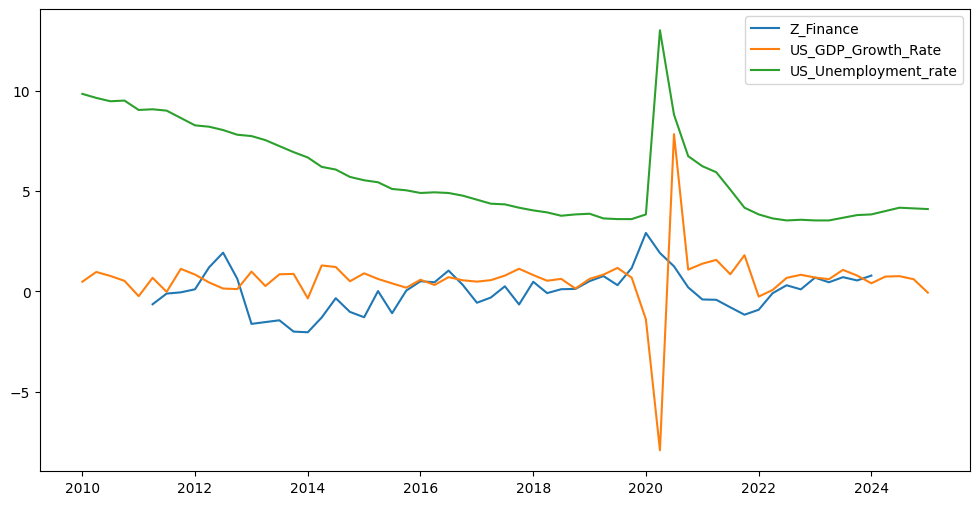

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(df_full.index, df_full["Z_FINANCE"], label="Z_Finance")
plt.plot(df_full.index, df_full["US_GDP_Growth_Rate"], label="US_GDP_Growth_Rate")
plt.plot(df_full.index, df_full["US_Unemployment_rate"], label="US_Unemployment_rate")
plt.legend()
plt.show()

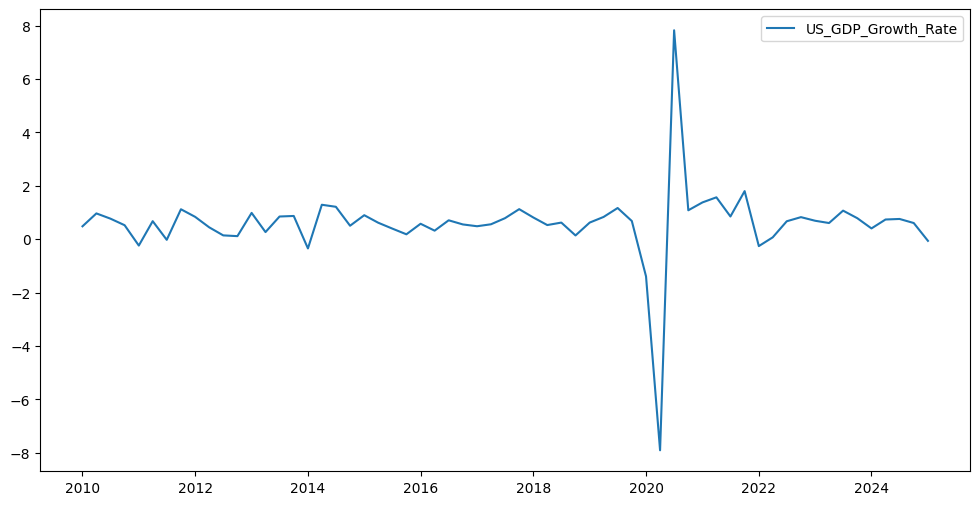

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(df_full.index, df_full["US_GDP_Growth_Rate"], 
         label="US_GDP_Growth_Rate")
plt.legend()
plt.show()

In [125]:
import numpy as np
import pandas as pd
import warnings

from statsmodels.tsa.stattools import adfuller, kpss

def stationarity_tests_summary(
    df: pd.DataFrame,
    variables=None,
    adf_alpha: float = 0.05,
    kpss_alpha: float = 0.05,
    kpss_regression: str = "c",
    autolag: str = "AIC",
    dropna: bool = True,
    min_n: int = 20
) -> pd.DataFrame:
    """
    Calcule ADF + KPSS pour une liste de variables, renvoie un tableau récapitulatif
    avec p-values, décisions à 5% et diagnostic.

    Parameters
    ----------
    df : DataFrame (wide) avec colonnes = variables.
    variables : list[str] ou None (par défaut: toutes les colonnes numériques).
    adf_alpha : seuil de rejet ADF (H0 = non-stationnaire).
    kpss_alpha : seuil de rejet KPSS (H0 = stationnaire).
    kpss_regression : 'c' (stationnaire autour d'une constante) ou 'ct' (constante+tendance).
    autolag : méthode de sélection du lag pour ADF ('AIC','BIC','t-stat',None).
    dropna : supprime les NA avant tests.
    min_n : taille minimale requise pour lancer les tests.

    Returns
    -------
    DataFrame avec colonnes:
    variable, n, adf_pvalue, kpss_pvalue, ADF_stationary_5pct, KPSS_stationary_5pct, diagnosis
    """
    if variables is None:
        # par défaut: toutes les colonnes numériques
        variables = df.select_dtypes(include=[np.number]).columns.tolist()
    else:
        variables = list(variables)

    results = []

    for var in variables:
        if var not in df.columns:
            results.append({
                "variable": var, "n": 0,
                "adf_pvalue": np.nan, "kpss_pvalue": np.nan,
                "ADF_stationary_5pct": np.nan, "KPSS_stationary_5pct": np.nan,
                "diagnosis": "Missing"
            })
            continue

        s = df[var]
        s = s.dropna() if dropna else s

        # Cast float (évite certains soucis)
        s = pd.to_numeric(s, errors="coerce").dropna()

        n = len(s)

        # Cas série trop courte / constante
        if n < min_n or s.nunique() <= 1:
            results.append({
                "variable": var, "n": n,
                "adf_pvalue": np.nan, "kpss_pvalue": np.nan,
                "ADF_stationary_5pct": np.nan, "KPSS_stationary_5pct": np.nan,
                "diagnosis": "Insufficient/Constant"
            })
            continue

        # -------- ADF --------
        adf_p = np.nan
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                adf_out = adfuller(s.values, autolag=autolag)
            adf_p = float(adf_out[1])
        except Exception:
            adf_p = np.nan

        # -------- KPSS --------
        kpss_p = np.nan
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                kpss_out = kpss(s.values, regression=kpss_regression, nlags="auto")
            kpss_p = float(kpss_out[1])
        except Exception:
            kpss_p = np.nan

        # Décisions
        # ADF: rejeter H0 (non-stationnaire) si p < alpha => stationnaire
        adf_stationary = (adf_p < adf_alpha) if not np.isnan(adf_p) else np.nan
        # KPSS: rejeter H0 (stationnaire) si p < alpha => non stationnaire
        # donc stationnaire si p > alpha
        kpss_stationary = (kpss_p > kpss_alpha) if not np.isnan(kpss_p) else np.nan

        # Diagnostic combiné
        if adf_stationary is True and kpss_stationary is True:
            diag = "Stationary"
        elif adf_stationary is False and kpss_stationary is False:
            diag = "Non-stationary"
        elif (adf_stationary is np.nan) or (kpss_stationary is np.nan):
            diag = "Test failed"
        else:
            diag = "Ambiguous"

        results.append({
            "variable": var,
            "n": n,
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_stationary,
            "KPSS_stationary_5pct": kpss_stationary,
            "diagnosis": diag
        })

    out = pd.DataFrame(results)

    # Optionnel: trier pour lecture (Non-stationary / Ambiguous / Stationary)
    order = pd.CategoricalDtype(
        categories=["Non-stationary", "Ambiguous", "Stationary", "Insufficient/Constant", "Missing", "Test failed"],
        ordered=True
    )
    if "diagnosis" in out.columns:
        out["diagnosis"] = out["diagnosis"].astype(order)

    return out


In [126]:
variables = df_full.columns.tolist()
stationarity_df = stationarity_tests_summary(df_full, variables)
stationarity_df


,variable,n,adf_pvalue,kpss_pvalue,ADF_stationary_5pct,KPSS_stationary_5pct,diagnosis
0,US_Central_bank_Intervention_rate_policy_inter...,61,9.969745e-01,0.010000,False,False,Non-stationary
1,US_Effective_exchange_rate,61,9.442045e-01,0.010000,False,False,Non-stationary
2,US_Equity_prices,61,9.988414e-01,0.010000,False,False,Non-stationary
3,US_GDP_Growth_Rate,61,7.219137e-11,0.100000,True,True,Stationary
4,US_House_prices_residential,61,9.306144e-01,0.010000,False,False,Non-stationary
5,US_Inflation_rate,61,5.391757e-01,0.049518,False,False,Non-stationary
6,US_Long_term_interest_rate,61,5.324999e-01,0.100000,False,True,Ambiguous
7,US_Oil_price,61,2.953302e-01,0.100000,False,True,Ambiguous
8,US_Unemployment_rate,61,6.014751e-02,0.010000,False,False,Non-stationary
9,Z_CONSTRUCTION_and_IMMOBILIER,52,1.257648e-13,0.047357,True,False,Ambiguous


## Stationnarité des variables macroéconomiques et transformations retenues

Les tests de stationnarité ADF et KPSS appliqués aux variables macroéconomiques indiquent que la majorité des séries en niveau sont non stationnaires, ce qui est conforme aux propriétés empiriques bien documentées des séries macroéconomiques. Afin d’éviter toute régression fallacieuse dans la modélisation satellite, ces variables sont transformées de manière appropriée pour assurer leur stationnarité avant estimation.

Les transformations retenues s’appuient sur les pratiques standards en économétrie appliquée et en modélisation du risque de crédit, en tenant compte de la nature économique de chaque variable.

---

### 🔹 Taux d’intérêt de la Banque Centrale
**Transformation : différence première**

Les taux directeurs présentent généralement des comportements persistants, marqués par des régimes de politique monétaire successifs. Leur niveau est souvent non stationnaire, tandis que leurs variations capturent les décisions discrétionnaires des banques centrales.

\[
\Delta r_t = r_t - r_{t-1}
\]

---

### 🔹 Taux d’intérêt à long terme
**Transformation : différence première**

Les taux longs reflètent les anticipations de croissance et d’inflation à long terme et sont susceptibles de contenir une tendance stochastique. La différenciation permet d’isoler les variations conjoncturelles pertinentes pour le risque de crédit.

---

### 🔹 Taux de chômage
**Transformation : différence première**

Le taux de chômage est une variable structurelle, caractérisée par une forte inertie. La différenciation permet de capturer les variations du marché du travail, plus directement liées aux cycles économiques.

---

### 🔹 Taux d’inflation (États-Unis)
**Transformation : différence première**

Bien que l’inflation soit parfois stationnaire selon la période considérée, elle peut présenter des ruptures de régime. La différenciation est retenue par prudence afin de garantir la stationnarité.

---

### 🔹 Produit Intérieur Brut (PIB)
**Transformation : variation logarithmique (log-ratio)**

Le PIB est une variable strictement croissante à long terme. La transformation logarithmique en taux de croissance permet d’obtenir une série stationnaire, interprétable comme une croissance économique.

\[
\Delta \log(Y_t) = \log(Y_t) - \log(Y_{t-1})
\]

---

### 🔹 Taux de change effectif
**Transformation : variation logarithmique (log-ratio)**

Les taux de change sont modélisés comme des processus intégrés. La variation logarithmique permet de capturer les rendements de change, généralement stationnaires.

---

### 🔹 Prix du marché boursier (États-Unis)
**Transformation : variation logarithmique (log-ratio)**

Les indices boursiers présentent une tendance de long terme liée à la croissance économique et à l’inflation. Les rendements logarithmiques constituent une représentation stationnaire et économiquement interprétable.

---

### 🔹 Prix de l’immobilier résidentiel (États-Unis)
**Transformation : variation logarithmique (log-ratio)**

Les prix immobiliers suivent des dynamiques de long terme avec des cycles marqués. La transformation en rendements logarithmiques permet de neutraliser la tendance et de capter les fluctuations cycliques.

---

### 🔹 Prix du pétrole (États-Unis)
**Transformation : variation logarithmique (log-ratio)**

Les prix des matières premières sont volatils et souvent non stationnaires en niveau. Les variations logarithmiques sont privilégiées afin de modéliser les chocs de prix de manière stationnaire.

---

### Conclusion

À l’issue de ces transformations, l’ensemble des variables macroéconomiques utilisées dans la modélisation satellite satisfait les conditions de stationnarité requises pour l’estimation de modèles linéaires. Les facteurs systémiques sectoriels, déjà stationnaires en niveau, sont conservés sans transformation supplémentaire.


In [127]:
df_filtre = df_full.loc["2011-04-01":"2024-01-01"]



In [128]:
df_full=df_filtre.copy()

In [129]:
import numpy as np
import pandas as pd

TRANSFORMATIONS = {
    # Interest rates -> difference
    "EU_Central_bank_Intervention_rate_policy_interest_rate": "diff",
    "EU_Long_term_interest_rate": "diff",
    "US_Central_bank_Intervention_rate_policy_interest_rate": "diff",
    "US_Long_term_interest_rate": "diff",

    # Unemployment & inflation -> difference
    "EU_Unemployment_rate": "diff",
    "US_Unemployment_rate": "diff",
    "US_Inflation_rate": "diff",

    # Exchange rates -> log ratio
    "EU_Effective_exchange_rate": "log_ratio",
    "US_Effective_exchange_rate": "log_ratio",

    # Prices -> log ratio
    "US_Equity_prices": "log_ratio",
    "US_House_prices_residential": "log_ratio",
    "US_Oil_price": "log_ratio",

    # GDP growth rates -> keep (already stationary in your tests)
    "EU_GDP_Growth_Rate": "level",
    "US_GDP_Growth_Rate": "level",
}


In [130]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def _adf_kpss(series, regression="c"):
    s = series.dropna()
    if len(s) < 20:
        return np.nan, np.nan  # pas assez de points
    adf_p = adfuller(s, autolag="AIC")[1]
    kpss_p = kpss(s, regression=regression, nlags="auto")[1]
    return adf_p, kpss_p

def _diagnosis(adf_p, kpss_p, alpha=0.05):
    adf_stat = (adf_p < alpha) if pd.notna(adf_p) else False
    kpss_stat = (kpss_p > alpha) if pd.notna(kpss_p) else False
    if adf_stat and kpss_stat:
        return True, True, "Stationary"
    if (not adf_stat) and (not kpss_stat):
        return False, False, "Non-stationary"
    return adf_stat, kpss_stat, "Ambiguous"

def stationarize_and_test(
    df_wide: pd.DataFrame,
    transformations: dict,
    alpha: float = 0.05,
    kpss_regression: str = "c",
    add_prefix: bool = False,
):
    """
    df_wide: index=date (monthly), columns=variables
    transformations: dict {colname: 'level'|'diff'|'log_ratio'}
    add_prefix: if True, columns are renamed e.g. d_EU_rate, lr_US_fx, ...
    """
    df = df_wide.copy()

    # --- sanity check: missing keys / missing columns
    missing_in_df = [k for k in transformations.keys() if k not in df.columns]
    missing_in_dict = [c for c in df.columns if c not in transformations.keys()]

    if missing_in_df:
        print("⚠️ Keys in TRANSFORMATIONS but not in df columns:", missing_in_df)
    if missing_in_dict:
        print("⚠️ Columns in df but not in TRANSFORMATIONS (kept as level):", missing_in_dict)

    # default = level for unspecified columns
    trans = {c: transformations.get(c, "level") for c in df.columns}

    # --- tests BEFORE
    before_rows = []
    for c in df.columns:
        adf_p, kpss_p = _adf_kpss(df[c], regression=kpss_regression)
        adf_ok, kpss_ok, diag = _diagnosis(adf_p, kpss_p, alpha=alpha)
        before_rows.append({
            "variable": c,
            "transform": "level",
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_ok,
            "KPSS_stationary_5pct": kpss_ok,
            "diagnosis": diag
        })
    before_df = pd.DataFrame(before_rows)

    # --- apply transformations
    out = pd.DataFrame(index=df.index)

    def apply_one(s, how):
        if how == "level":
            return s
        if how == "diff":
            return s.diff()
        if how == "log_ratio":
            # safe log: only for strictly positive series
            s2 = s.replace(0, np.nan)
            return np.log(s2).diff()
        raise ValueError(f"Unknown transformation: {how}")

    rename_map = {}
    for c in df.columns:
        how = trans[c]
        s_tr = apply_one(df[c], how)
        if add_prefix:
            pref = {"level":"", "diff":"d_", "log_ratio":"lr_"}[how]
            new_name = pref + c
        else:
            new_name = c
        out[new_name] = s_tr
        rename_map[c] = new_name

    # --- tests AFTER
    after_rows = []
    for c_old in df.columns:
        c = rename_map[c_old]
        how = trans[c_old]
        adf_p, kpss_p = _adf_kpss(out[c], regression=kpss_regression)
        adf_ok, kpss_ok, diag = _diagnosis(adf_p, kpss_p, alpha=alpha)
        after_rows.append({
            "variable": c_old,
            "transform": how,
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_ok,
            "KPSS_stationary_5pct": kpss_ok,
            "diagnosis": diag
        })
    after_df = pd.DataFrame(after_rows)

    return out, before_df, after_df


In [131]:
# df_macro_wide : index = date_q, columns = variables
out, before_df, after_df= stationarize_and_test(df_full, TRANSFORMATIONS)

df_macro_stationary = after_df
df_macro_stationary

⚠️ Keys in TRANSFORMATIONS but not in df columns: ['EU_Central_bank_Intervention_rate_policy_interest_rate', 'EU_Long_term_interest_rate', 'EU_Unemployment_rate', 'EU_Effective_exchange_rate', 'EU_GDP_Growth_Rate']
⚠️ Columns in df but not in TRANSFORMATIONS (kept as level): ['Z_CONSTRUCTION_and_IMMOBILIER', 'Z_FINANCE', 'Z_INDUSTRIE', 'Z_INFO_COM', 'Z_PRIMAIRES_and_ÉNERGIE', 'Z_PUBLIC_and_SERVICES_NON_MARCHANDS', 'Z_SERVICES', 'Z_SERVICES_PRO']


C:\Users\werid\AppData\Local\Temp\ipykernel_31596\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_31596\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_31596\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_31596\2235916527.py:10: InterpolationWarning: The test statistic is outsid

,variable,transform,adf_pvalue,kpss_pvalue,ADF_stationary_5pct,KPSS_stationary_5pct,diagnosis
0,US_Central_bank_Intervention_rate_policy_inter...,diff,2.801553e-07,0.100000,True,True,Stationary
1,US_Effective_exchange_rate,log_ratio,1.367274e-06,0.100000,True,True,Stationary
2,US_Equity_prices,log_ratio,1.608059e-04,0.100000,True,True,Stationary
3,US_GDP_Growth_Rate,level,4.052873e-16,0.100000,True,True,Stationary
4,US_House_prices_residential,log_ratio,1.963558e-02,0.100000,True,True,Stationary
5,US_Inflation_rate,diff,8.235450e-02,0.100000,False,True,Ambiguous
6,US_Long_term_interest_rate,diff,8.337319e-06,0.100000,True,True,Stationary
7,US_Oil_price,log_ratio,8.658109e-08,0.100000,True,True,Stationary
8,US_Unemployment_rate,diff,3.469065e-14,0.100000,True,True,Stationary
9,Z_CONSTRUCTION_and_IMMOBILIER,level,1.257648e-13,0.047357,True,False,Ambiguous


In [132]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def _adf_kpss(series, regression="c"):
    s = series.dropna()
    if len(s) < 20:
        return np.nan, np.nan  # pas assez de points
    adf_p = adfuller(s, autolag="AIC")[1]
    kpss_p = kpss(s, regression=regression, nlags="auto")[1]
    return adf_p, kpss_p

def _diagnosis(adf_p, kpss_p, alpha=0.05):
    adf_stat = (adf_p < alpha) if pd.notna(adf_p) else False
    kpss_stat = (kpss_p > alpha) if pd.notna(kpss_p) else False
    if adf_stat and kpss_stat:
        return True, True, "Stationary"
    if (not adf_stat) and (not kpss_stat):
        return False, False, "Non-stationary"
    return adf_stat, kpss_stat, "Ambiguous"

def stationarize_and_test(
    df_wide: pd.DataFrame,
    transformations: dict,
    alpha: float = 0.05,
    kpss_regression: str = "c",
    add_prefix: bool = False,
):
    """
    df_wide: index=date (monthly), columns=variables
    transformations: dict {colname: 'level'|'diff'|'log_ratio'}
    add_prefix: if True, columns are renamed e.g. d_EU_rate, lr_US_fx, ...
    """
    df = df_wide.copy()

    # --- sanity check: missing keys / missing columns
    missing_in_df = [k for k in transformations.keys() if k not in df.columns]
    missing_in_dict = [c for c in df.columns if c not in transformations.keys()]

    if missing_in_df:
        print("⚠️ Keys in TRANSFORMATIONS but not in df columns:", missing_in_df)
    if missing_in_dict:
        print("⚠️ Columns in df but not in TRANSFORMATIONS (kept as level):", missing_in_dict)

    # default = level for unspecified columns
    trans = {c: transformations.get(c, "level") for c in df.columns}

    # --- tests BEFORE
    before_rows = []
    for c in df.columns:
        adf_p, kpss_p = _adf_kpss(df[c], regression=kpss_regression)
        adf_ok, kpss_ok, diag = _diagnosis(adf_p, kpss_p, alpha=alpha)
        before_rows.append({
            "variable": c,
            "transform": "level",
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_ok,
            "KPSS_stationary_5pct": kpss_ok,
            "diagnosis": diag
        })
    before_df = pd.DataFrame(before_rows)

    # --- apply transformations
    out = pd.DataFrame(index=df.index)

    def apply_one(s, how):
        if how == "level":
            return s
        if how == "diff":
            return s.diff()
        if how == "log_ratio":
            # safe log: only for strictly positive series
            s2 = s.replace(0, np.nan)
            return np.log(s2).diff()
        raise ValueError(f"Unknown transformation: {how}")

    rename_map = {}
    for c in df.columns:
        how = trans[c]
        s_tr = apply_one(df[c], how)
        if add_prefix:
            pref = {"level":"", "diff":"d_", "log_ratio":"lr_"}[how]
            new_name = pref + c
        else:
            new_name = c
        out[new_name] = s_tr
        rename_map[c] = new_name

    # --- tests AFTER
    after_rows = []
    for c_old in df.columns:
        c = rename_map[c_old]
        how = trans[c_old]
        adf_p, kpss_p = _adf_kpss(out[c], regression=kpss_regression)
        adf_ok, kpss_ok, diag = _diagnosis(adf_p, kpss_p, alpha=alpha)
        after_rows.append({
            "variable": c_old,
            "transform": how,
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_ok,
            "KPSS_stationary_5pct": kpss_ok,
            "diagnosis": diag
        })
    after_df = pd.DataFrame(after_rows)

    return out, before_df, after_df


In [133]:
df_macro_stationary, tests_before, tests_after = stationarize_and_test(
    df_full,
    TRANSFORMATIONS,
    alpha=0.05,
    add_prefix=False
)

df_macro_stationary.head()
tests_after.sort_values("diagnosis").head(20)


⚠️ Keys in TRANSFORMATIONS but not in df columns: ['EU_Central_bank_Intervention_rate_policy_interest_rate', 'EU_Long_term_interest_rate', 'EU_Unemployment_rate', 'EU_Effective_exchange_rate', 'EU_GDP_Growth_Rate']
⚠️ Columns in df but not in TRANSFORMATIONS (kept as level): ['Z_CONSTRUCTION_and_IMMOBILIER', 'Z_FINANCE', 'Z_INDUSTRIE', 'Z_INFO_COM', 'Z_PRIMAIRES_and_ÉNERGIE', 'Z_PUBLIC_and_SERVICES_NON_MARCHANDS', 'Z_SERVICES', 'Z_SERVICES_PRO']


C:\Users\werid\AppData\Local\Temp\ipykernel_31596\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_31596\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_31596\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_31596\2235916527.py:10: InterpolationWarning: The test statistic is outsid

,variable,transform,adf_pvalue,kpss_pvalue,ADF_stationary_5pct,KPSS_stationary_5pct,diagnosis
14,Z_PUBLIC_and_SERVICES_NON_MARCHANDS,level,1.831503e-01,0.100000,False,True,Ambiguous
5,US_Inflation_rate,diff,8.235450e-02,0.100000,False,True,Ambiguous
10,Z_FINANCE,level,5.374766e-02,0.100000,False,True,Ambiguous
9,Z_CONSTRUCTION_and_IMMOBILIER,level,1.257648e-13,0.047357,True,False,Ambiguous
15,Z_SERVICES,level,8.616089e-02,0.100000,False,True,Ambiguous
0,US_Central_bank_Intervention_rate_policy_inter...,diff,2.801553e-07,0.100000,True,True,Stationary
13,Z_PRIMAIRES_and_ÉNERGIE,level,1.361861e-02,0.100000,True,True,Stationary
12,Z_INFO_COM,level,1.024406e-03,0.100000,True,True,Stationary
11,Z_INDUSTRIE,level,1.094503e-02,0.100000,True,True,Stationary
8,US_Unemployment_rate,diff,3.469065e-14,0.100000,True,True,Stationary


Pour les taux directeurs, la différenciation première est retenue afin d’assurer la stationnarité. Dans certains cas, les tests ADF et KPSS conduisent à des conclusions divergentes, ce qui est un résultat classique pour des séries caractérisées par de longues périodes de paliers et des changements discrets. Conformément aux pratiques usuelles, la décision repose principalement sur le test ADF et sur la cohérence économique de la transformation.


# Modèles Satellites

## Modèles satellites macroéconomiques (Model Averaging)


### Objectif
L'objectif des modèles satellites est de relier, pour chaque secteur $s$, le facteur de risque systémique estimé à l'étape précédente, noté $Z_{s,t}$ (ou sa version standardisée $\tilde Z_{s,t}$), à un ensemble de variables macroéconomiques $X_t$.  
Cette relation permet (i) d'interpréter économiquement la dynamique du risque de crédit sectoriel et (ii) de projeter $Z_{s,t}$ sous scénarios macroéconomiques (notamment NGFS) dans les étapes ultérieures.

### Alignement temporel et transformations
Les facteurs $Z_{s,t}$ sont initialement estimés à fréquence mensuelle. Afin d'assurer la cohérence avec les variables macroéconomiques disponibles à fréquence trimestrielle, une agrégation trimestrielle est retenue :
$$
Z_{s,q} = \frac{1}{3}\sum_{m \in q} Z_{s,m},
$$
où $q$ désigne un trimestre. Les facteurs sont ensuite standardisés par secteur :
$$
\tilde Z_{s,q} = \frac{Z_{s,q} - \mu_s}{\sigma_s}.
$$
Les variables macroéconomiques sont stationnarisées selon des transformations usuelles (différences premières pour les taux et le chômage, log-ratios pour les niveaux de prix et d'activité), conformément aux tests ADF et KPSS.

### Spécification des modèles candidats
Pour chaque secteur $s$, on considère une famille de modèles linéaires candidats $\{M_k\}_{k=1}^K$, de la forme :
$$
\tilde Z_{s,q} = \alpha_{s,k} + \beta_{s,k}' X^{(k)}_{q-\ell} + u_{s,q},
$$
où $X^{(k)}$ représente un sous-ensemble de variables macroéconomiques (éventuellement retardées), et $\ell$ un ordre de retard retenu (par exemple $\ell \in \{0,1,2\}$).  
L'espace des modèles est construit de façon parcimonieuse afin de limiter la colinéarité et d'assurer une interprétabilité économique.

### Estimation et pondération (Model Averaging)
Chaque modèle $M_k$ est estimé par moindres carrés ordinaires.  
Plutôt que de sélectionner un unique modèle, une combinaison pondérée des prédictions est retenue :
$$
\widehat{\tilde Z}_{s,q} = \sum_{k=1}^K w_k \widehat{\tilde Z}^{(k)}_{s,q},
\qquad \sum_{k=1}^K w_k = 1,\; w_k \ge 0.
$$
Les poids $w_k$ peuvent être déterminés soit par un critère informationnel (AIC/BIC), soit sur la base de la performance prédictive hors-échantillon.  
Dans ce travail, une pondération basée sur la performance hors-échantillon est privilégiée, afin de maximiser la robustesse des projections.

### Validation
La validation repose sur (i) des mesures de performance en prévision (RMSE hors-échantillon), (ii) la stabilité des résidus (autocorrélation et stationnarité), et (iii) la cohérence économique des signes estimés.  
Les poids associés aux modèles dominants sont analysés afin d'identifier les principaux déterminants macroéconomiques du risque de crédit sectoriel.


In [134]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm

def _all_combinations(items, min_k=1, max_k=None):
    items = list(items)
    if max_k is None:
        max_k = len(items)
    for k in range(min_k, max_k + 1):
        for comb in itertools.combinations(items, k):
            yield list(comb)

def _build_design_matrix(df, x_cols, add_const=True):
    X = df[x_cols].copy()
    if add_const:
        X = sm.add_constant(X, has_constant="add")
    return X

def _fit_ols(df, y_col, x_cols, add_const=True):
    d = df[[y_col] + x_cols].dropna()
    if d.shape[0] < 30:  # garde-fou : trop peu d'observations
        return None
    
    y = d[y_col].astype(float)
    X = _build_design_matrix(d, x_cols, add_const=add_const).astype(float)
    
    try:
        model = sm.OLS(y, X).fit()
        return model
    except Exception:
        return None

def _sign_ok(beta, expected_sign, tol=1e-12):
    """
    beta: Series of coefficients (incl. const possible)
    expected_sign: dict {var: +1 or -1}
    """
    for var, sgn in expected_sign.items():
        if var not in beta.index:
            continue  # var pas dans ce modèle
        b = beta[var]
        # on tolère quasi-zéro (pour éviter de rejeter pour bruit numérique)
        if abs(b) <= tol:
            continue
        if np.sign(b) != np.sign(sgn):
            return False
    return True


In [135]:
def add_lags(df, cols, lags=(0,1,2), sep="_L"):
    """
    Crée des colonnes décalées.
    ex: GDP -> GDP_L0, GDP_L1, GDP_L2
    """
    out = df.copy()
    new_cols = []
    for c in cols:
        for L in lags:
            name = f"{c}{sep}{L}"
            out[name] = out[c].shift(L)
            new_cols.append(name)
    return out, new_cols


In [136]:
def build_admissible_model_space(
    df,
    y_col,
    x_base_cols,
    expected_sign_base,
    min_k=1,
    max_k=6,
    use_lags=False,
    lags=(0,1,2),
    lag_sep="_L",
    add_const=True,
    alpha_sign=0.05,
    require_significant=False,
    verbose=True
):
    """
    - Génère toutes les combinaisons de variables (entre min_k et max_k)
    - Estime un OLS pour chaque combinaison
    - Filtre selon signes métier (et optionnellement significance)
    
    expected_sign_base: dict {col_name: +1 or -1} pour les variables NON laggées
    Si use_lags=True, on applique le même signe à tous les lags (GDP_L1 etc.)
    """

    df_work = df.copy()

    # 1) lags
    if use_lags:
        df_work, x_cols = add_lags(df_work, x_base_cols, lags=lags, sep=lag_sep)
        # étendre les signes attendus à tous les lags
        expected_sign = {}
        for base, sgn in expected_sign_base.items():
            for L in lags:
                expected_sign[f"{base}{lag_sep}{L}"] = sgn
    else:
        x_cols = list(x_base_cols)
        expected_sign = dict(expected_sign_base)

    # 2) générer les combinaisons
    combos = list(_all_combinations(x_cols, min_k=min_k, max_k=min(max_k, len(x_cols))))
    if verbose:
        print(f"Nombre de modèles candidats: {len(combos)} (y={y_col})")

    rows = []
    admissible_models = []

    for x_list in combos:
        m = _fit_ols(df_work, y_col=y_col, x_cols=x_list, add_const=add_const)
        if m is None:
            continue
        
        beta = m.params
        
        # Filtre signe
        ok_sign = _sign_ok(beta, expected_sign)
        if not ok_sign:
            rows.append({
                "y": y_col,
                "k": len(x_list),
                "x": tuple(x_list),
                "ok_sign": False,
                "ok_sig": None,
                "aic": m.aic,
                "bic": m.bic,
                "r2_adj": m.rsquared_adj,
                "n": int(m.nobs)
            })
            continue

        # Filtre optionnel : coefficients significatifs ET au bon signe
        ok_sig = True
        if require_significant:
            pvals = m.pvalues
            for var in x_list:
                if var in pvals.index and pvals[var] > alpha_sign:
                    ok_sig = False
                    break
        
        rows.append({
            "y": y_col,
            "k": len(x_list),
            "x": tuple(x_list),
            "ok_sign": True,
            "ok_sig": ok_sig,
            "aic": m.aic,
            "bic": m.bic,
            "r2_adj": m.rsquared_adj,
            "n": int(m.nobs)
        })

        if ok_sig:
            admissible_models.append({
                "x": x_list,
                "model": m
            })

    summary = pd.DataFrame(rows).sort_values(["ok_sign", "ok_sig", "bic"], ascending=[False, False, True])

    if verbose:
        total = len(combos)
        ok_sign_count = int((summary["ok_sign"] == True).sum()) if len(summary) else 0
        ok_sig_count = int(((summary["ok_sign"] == True) & (summary["ok_sig"] == True)).sum()) if len(summary) else 0
        print(f"OK signes: {ok_sign_count}/{total}")
        if require_significant:
            print(f"OK signes + significatifs: {ok_sig_count}/{total}")

    return summary, admissible_models, df_work


In [137]:
EXPECTED_SIGN = {
    "EU_Central_bank_Intervention_rate_policy_interest_rate": -1,
    "EU_Long_term_interest_rate": -1,
    "EU_Unemployment_rate": -1,
    "US_Inflation_rate": -1,
    "EU_GDP_Growth_Rate": +1,
    "US_House_prices_residential": +1,
    # si tu ajoutes d'autres variables, précise le signe
}


In [ ]:
y_col = "Z_PRIMAIRES_and_ÉNERGIE"
x_cols = df_macro_stationary.loc[:, ~df_macro_stationary.columns.str.startswith("Z_")].columns.tolist()

summary, admissible, df_used = build_admissible_model_space(
    df=df_macro_stationary,            # ton df stationnarisé aligné
    y_col=y_col,
    x_base_cols=x_cols,
    expected_sign_base=EXPECTED_SIGN,
    min_k=1,
    max_k=3,                      # évite explosion combinatoire
    use_lags=True,
    lags=(0,1,2,3,4),
    require_significant=False,    # mets True si tu veux filtrer aussi sur p-values
    verbose=True
)





Nombre de modèles candidats: 15225 (y=Z_PRIMAIRES_and_ÉNERGIE)


In [ ]:
summary

,y,k,x,ok_sign,ok_sig,aic,bic,r2_adj,n
2707,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,96.037638,103.438228,0.621984,47
14897,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Long_term_interest_rate_L1, US_Oil_price_L...",True,True,96.458591,103.859182,0.618583,47
2721,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,97.404233,105.052325,0.633499,50
1804,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,102.511610,109.912200,0.566158,47
2841,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,102.781476,110.266280,0.573892,48
...,...,...,...,...,...,...,...,...,...
6204,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Effective_exchange_rate_L1, US_Equity_pric...",False,None,149.451955,157.100047,-0.037901,50
6414,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Effective_exchange_rate_L1, US_GDP_Growth_...",False,None,149.470406,157.118498,-0.038284,50
8689,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Equity_prices_L0, US_Equity_prices_L1, US_...",False,None,150.036958,157.685050,-0.050115,50
9394,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Equity_prices_L1, US_GDP_Growth_Rate_L2, U...",False,None,150.037863,157.685955,-0.050134,50


In [ ]:
x_cols

['US_Central_bank_Intervention_rate_policy_interest_rate',
 'US_Effective_exchange_rate',
 'US_Equity_prices',
 'US_GDP_Growth_Rate',
 'US_House_prices_residential',
 'US_Inflation_rate',
 'US_Long_term_interest_rate',
 'US_Oil_price',
 'US_Unemployment_rate']

In [ ]:
summary=summary.sort_values(by="r2_adj",ascending=False).head(20)

In [ ]:
top10 = summary[(summary["ok_sign"] == True) & (summary["ok_sig"] != False)].head(10)
top10


,y,k,x,ok_sign,ok_sig,aic,bic,r2_adj,n
2721,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,97.404233,105.052325,0.633499,50
2707,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,96.037638,103.438228,0.621984,47
14897,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Long_term_interest_rate_L1, US_Oil_price_L...",True,True,96.458591,103.859182,0.618583,47
1818,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,103.817067,111.465159,0.583345,50
2841,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,102.781476,110.266280,0.573892,48
1804,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,102.511610,109.912200,0.566158,47
1939,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,102.881092,110.281683,0.562734,47
2839,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,106.862229,114.510321,0.557181,50
15107,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Oil_price_L0, US_Oil_price_L1, US_Oil_pric...",True,True,103.488895,110.889485,0.557043,47
2842,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,103.517523,110.918114,0.556773,47


In [ ]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller

from scipy.stats import shapiro, jarque_bera
from itertools import combinations
from scipy.optimize import minimize


In [ ]:
import unicodedata
import re

def _norm_name(s: str) -> str:
    s = str(s)
    s = unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")  # enlève accents
    s = s.upper()
    s = re.sub(r"[^A-Z0-9_]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

def find_col(df: pd.DataFrame, wanted: str) -> str:
    w = _norm_name(wanted)
    mapping = { _norm_name(c): c for c in df.columns }
    if w in mapping:
        return mapping[w]
    # fallback : contains
    for k, v in mapping.items():
        if w in k or k in w:
            return v
    raise KeyError(f"Impossible de trouver une colonne proche de: {wanted}. Exemples colonnes Z: {df.filter(like='Z_').columns[:5].tolist()}")


In [ ]:
y_col = find_col(df_macro_stationary, "Z_PRIMAIRES_and_ÉNERGIE")

In [ ]:
def make_lagged_features(df: pd.DataFrame, cols, lags=(0,1,2,3,4)):
    out = {}
    for c in cols:
        for L in lags:
            name = f"{c}_L{L}"
            out[name] = df[c] if L == 0 else df[c].shift(L)
    return pd.DataFrame(out, index=df.index)


In [ ]:
def expand_expected_sign(expected_sign_base: dict, lags=(0,1,2,3,4)):
    exp = {}
    for var, sgn in expected_sign_base.items():
        for L in lags:
            exp[f"{var}_L{L}"] = sgn
    return exp

def sign_constraints_ok(params: pd.Series, expected_sign: dict, tol=1e-12):
    for var, sgn in expected_sign.items():
        if var in params.index:
            b = params[var]
            if abs(b) <= tol:
                continue
            if np.sign(b) != np.sign(sgn):
                return False
    return True


In [ ]:
def fit_ols_hac(df, y_col, x_cols, hac_lags=4, add_const=True, min_obs=40):
    d = df[[y_col] + x_cols].dropna().copy()
    if d.shape[0] < min_obs:
        return None

    y = d[y_col].astype(float)
    X = d[x_cols].astype(float)
    if add_const:
        X = sm.add_constant(X, has_constant="add")

    try:
        ols = sm.OLS(y, X).fit()
        hac = ols.get_robustcov_results(cov_type="HAC", maxlags=hac_lags)
        return {"ols": ols, "hac": hac, "data": d, "X": X, "y": y}
    except Exception:
        return None


In [ ]:
def residual_diagnostics(fit_dict, lb_lags=12, alpha=0.05):
    ols = fit_dict["ols"]
    X = fit_dict["X"]
    resid = ols.resid

    lb = acorr_ljungbox(resid, lags=[lb_lags], return_df=True)
    lb_p = float(lb["lb_pvalue"].iloc[0])

    bp_stat, bp_p, _, _ = het_breuschpagan(resid, X)

    sh_p = shapiro(resid)[1] if len(resid) <= 5000 else np.nan
    jb_p = jarque_bera(resid)[1]

    adf_p = adfuller(resid.dropna(), autolag="AIC")[1] if resid.notna().sum() > 20 else np.nan
    dw = durbin_watson(resid)

    return {
        "n": int(len(resid)),
        "lb_pvalue": lb_p,
        "bp_pvalue": float(bp_p),
        "shapiro_pvalue": float(sh_p) if not np.isnan(sh_p) else np.nan,
        "jb_pvalue": float(jb_p),
        "adf_resid_pvalue": float(adf_p) if not np.isnan(adf_p) else np.nan,
        "dw": float(dw),
        "LB_ok_5pct": (lb_p > alpha),
        "BP_ok_5pct": (bp_p > alpha),
    }


In [ ]:
def build_admissible_model_space(
    df: pd.DataFrame,
    y_col: str,
    x_base_cols: list,
    expected_sign_base: dict,
    min_k=1,
    max_k=3,
    use_lags=True,
    lags=(0,1,2,3,4),
    verbose=True
):
    # features X (laggées ou non)
    if use_lags:
        Xfeat = make_lagged_features(df, x_base_cols, lags=lags)
        expected_sign = expand_expected_sign(expected_sign_base, lags=lags)
    else:
        Xfeat = df[x_base_cols].copy()
        expected_sign = expected_sign_base.copy()

    df_used = pd.concat([df[[y_col]], Xfeat], axis=1)

    all_models = []
    for k in range(min_k, max_k+1):
        for comb in combinations(Xfeat.columns.tolist(), k):
            all_models.append(list(comb))

    if verbose:
        print(f"Nb variables candidates: {Xfeat.shape[1]}")
        print(f"Nb modèles (combinaisons {min_k}..{max_k}): {len(all_models)}")

    rows = []
    admissible = []
    for i, x_cols in enumerate(all_models):
        fit = fit_ols_hac(df_used, y_col, x_cols, hac_lags=max(lags), min_obs=40)
        if fit is None:
            continue

        ok_sign = sign_constraints_ok(fit["ols"].params, expected_sign)
        rows.append({
            "model_id": i,
            "k": len(x_cols),
            "x_cols": x_cols,
            "ok_sign": ok_sign,
            "aic": fit["ols"].aic,
            "bic": fit["ols"].bic,
            "r2_adj": fit["ols"].rsquared_adj
        })
        if ok_sign:
            admissible.append({"name": f"m{i}", "x": x_cols})

    summary = pd.DataFrame(rows).sort_values(["ok_sign","bic"], ascending=[False, True])
    if verbose and not summary.empty:
        print("OK_sign:", int(summary["ok_sign"].sum()), "/", summary.shape[0])

    return summary, admissible, df_used


In [ ]:
def hac_significance_ok(hac_res, x_cols, alpha=0.05, min_sig=1):
    pvals = pd.Series(hac_res.pvalues, index=hac_res.model.exog_names)
    vars_in = [v for v in x_cols if v in pvals.index]
    if not vars_in:
        return False
    return int((pvals[vars_in] < alpha).sum()) >= min_sig

def build_candidate_pool_and_filter(
    df, y_col, candidate_models, expected_sign,
    hac_lags=4, lb_lags=12, alpha=0.05,
    require_sig=False, sig_alpha=0.05, min_sig=1,
    enforce_bp=False, enforce_lb=True
):
    kept = []
    summary_rows = []

    for m in candidate_models:
        x_cols = m["x"]
        fit = fit_ols_hac(df, y_col, x_cols, hac_lags=hac_lags)
        if fit is None:
            continue

        ok_sign = sign_constraints_ok(fit["ols"].params, expected_sign)
        diag = residual_diagnostics(fit, lb_lags=lb_lags, alpha=alpha)

        ok_sig = True
        if require_sig:
            ok_sig = hac_significance_ok(fit["hac"], x_cols, alpha=sig_alpha, min_sig=min_sig)

        ok_lb = diag["LB_ok_5pct"] if enforce_lb else True
        ok_bp = diag["BP_ok_5pct"] if enforce_bp else True

        ok = ok_sign and ok_lb and ok_bp and ok_sig

        summary_rows.append({
            "model": m.get("name", str(tuple(x_cols))),
            "k": len(x_cols),
            "ok": ok,
            "ok_sign": ok_sign,
            "ok_lb": ok_lb,
            "ok_bp": ok_bp,
            "ok_sig": ok_sig,
            "aic": fit["ols"].aic,
            "bic": fit["ols"].bic,
            "r2_adj": fit["ols"].rsquared_adj,
            **diag
        })

        if ok:
            kept.append(m)

    summary = pd.DataFrame(summary_rows).sort_values(["ok","bic"], ascending=[False, True])
    return kept, summary


In [ ]:
def solve_simplex_weights_slsqp(Y, y):
    """
    Min ||y - Yw||^2 s.c w>=0, sum w = 1
    """
    T, M = Y.shape
    w0 = np.ones(M) / M

    cons = (
        {"type": "eq", "fun": lambda w: np.sum(w) - 1.0},
    )
    bounds = [(0.0, 1.0)] * M

    def obj(w):
        r = y - Y @ w
        return float(r.T @ r)

    res = minimize(obj, w0, method="SLSQP", bounds=bounds, constraints=cons)
    if not res.success:
        return None
    return res.x


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def fixed_model_predictions(df, y_col, x_cols, hac_lags=4, add_const=True,
                            train_slice=None, pred_slice=None):
    """
    Estime le modèle UNE SEULE FOIS (sur train_slice), puis prédit sur pred_slice.
    - train_slice: ex "2011-04-01":"2020-10-01" (ou None => tout df utilisable)
    - pred_slice : ex "2011-04-01":"2024-01-01" (ou None => mêmes dates que df utilisable)
    """
    # Sous-ensemble pour l'estimation
    d_all = df[[y_col] + x_cols].copy()

    if train_slice is not None:
        d_train = d_all.loc[train_slice].dropna()
    else:
        d_train = d_all.dropna()

    fit = fit_ols_hac(d_train, y_col, x_cols, hac_lags=hac_lags, add_const=add_const)
    if fit is None:
        return pd.Series(index=df.index, dtype=float)

    ols = fit["ols"]

    # Sous-ensemble pour la prédiction
    if pred_slice is not None:
        d_pred = d_all.loc[pred_slice].dropna(subset=x_cols)  # on peut prédire même si y est NA
    else:
        d_pred = d_all.dropna(subset=x_cols)

    X_pred = d_pred[x_cols].astype(float)
    if add_const:
        X_pred = sm.add_constant(X_pred, has_constant="add")

    yhat = pd.Series(index=df.index, dtype=float)
    yhat.loc[d_pred.index] = ols.predict(X_pred).values
    return yhat


def stacking_and_jma_fixed(df, y_col, kept_models, hac_lags=4, add_const=True,
                           train_slice=None, pred_slice=None,
                           weight_fit_slice=None):
    """
    - Prédictions de chaque modèle: fit 1 fois (train_slice), prédire sur pred_slice
    - Poids stacking/JMA: estimés sur weight_fit_slice (sinon: intersection où y et toutes preds existent)
    """
    preds = {}
    for i, m in enumerate(kept_models):
        name = m.get("name", f"m{i}")
        preds[name] = fixed_model_predictions(
            df=df,
            y_col=y_col,
            x_cols=m["x"],
            hac_lags=hac_lags,
            add_const=add_const,
            train_slice=train_slice,
            pred_slice=pred_slice
        )

    P = pd.DataFrame(preds)

    # Data pour estimer les poids: il faut y et toutes les preds non-NA
    if weight_fit_slice is not None:
        d_w = pd.concat([df[[y_col]].loc[weight_fit_slice], P.loc[weight_fit_slice]], axis=1).dropna()
    else:
        d_w = pd.concat([df[[y_col]], P], axis=1).dropna()

    y = d_w[y_col].values
    Y = d_w[P.columns].values

    w = solve_simplex_weights_slsqp(Y, y)
    if w is None:
        raise RuntimeError("Solver SLSQP a échoué pour les poids.")

    weights = pd.Series(w, index=P.columns, name="w_stacking")

    # Série finale des prédictions moyennées (sur les dates où on a des prédictions pour tous les modèles)
    d_pred = P.dropna()  # intersection des dates prédictibles
    yhat = pd.Series(d_pred.values @ w, index=d_pred.index, name="yhat_stacked")

    return {
        "P": P,
        "weights_stacking": weights,
        "weights_jma": weights.rename("w_jma"),
        "oos_frame_weights": d_w,   # frame utilisée pour apprendre les poids
        "yhat_stacked": yhat
    }


APPLICATION

In [ ]:
y_col = find_col(df_macro_stationary, "Z_PRIMAIRES_and_ÉNERGIE")
print("y_col retenu =", y_col)


y_col retenu = Z_PRIMAIRES_and_ÉNERGIE


In [ ]:
x_cols = df_macro_stationary.loc[:, ~df_macro_stationary.columns.str.startswith("Z_")].columns.tolist()


In [ ]:
EXPECTED_SIGN = {
    "EU_Central_bank_Intervention_rate_policy_interest_rate": -1,
    "EU_Long_term_interest_rate": -1,
    "EU_Unemployment_rate": -1,
    "EU_Effective_exchange_rate": -1,  # à discuter (dépend convention)
    "EU_GDP_Growth_Rate": +1,

    "US_Central_bank_Intervention_rate_policy_interest_rate": -1,
    "US_Long_term_interest_rate": -1,
    "US_Unemployment_rate": -1,
    "US_Inflation_rate": -1,
    "US_Oil_price": -1,               # à discuter
    "US_Equity_prices": +1,
    "US_House_prices_residential": +1,
    "US_GDP_Growth_Rate": +1,
}


In [ ]:
summary, admissible, df_used = build_admissible_model_space(
    df=df_macro_stationary,
    y_col=y_col,
    x_base_cols=x_cols,
    expected_sign_base=EXPECTED_SIGN,
    min_k=1,
    max_k=3,
    use_lags=True,
    lags=(0,1,2,3,4),
    verbose=True
)

summary.head(10)
print("Nb modèles admissibles (signe OK):", len(admissible))


Nb variables candidates: 45
Nb modèles (combinaisons 1..3): 15225
OK_sign: 3713 / 15225
Nb modèles admissibles (signe OK): 3713


In [ ]:
summary

,model_id,k,x_cols,ok_sign,aic,bic,r2_adj
2707,2707,3,[US_Central_bank_Intervention_rate_policy_inte...,True,96.037638,103.438228,0.621984
14897,14897,3,"[US_Long_term_interest_rate_L1, US_Oil_price_L...",True,96.458591,103.859182,0.618583
2721,2721,3,[US_Central_bank_Intervention_rate_policy_inte...,True,97.404233,105.052325,0.633499
1804,1804,3,[US_Central_bank_Intervention_rate_policy_inte...,True,102.511610,109.912200,0.566158
2841,2841,3,[US_Central_bank_Intervention_rate_policy_inte...,True,102.781476,110.266280,0.573892
...,...,...,...,...,...,...,...
8689,8689,3,"[US_Equity_prices_L0, US_Equity_prices_L1, US_...",False,150.036958,157.685050,-0.050115
9394,9394,3,"[US_Equity_prices_L1, US_GDP_Growth_Rate_L2, U...",False,150.037863,157.685955,-0.050134
8866,8866,3,"[US_Equity_prices_L0, US_GDP_Growth_Rate_L2, U...",False,150.216932,157.865024,-0.053902
8685,8685,3,"[US_Equity_prices_L0, US_Equity_prices_L1, US_...",False,150.497107,158.145199,-0.059824


In [ ]:
admissible

[{'name': 'm0',
  'x': ['US_Central_bank_Intervention_rate_policy_interest_rate_L0']},
 {'name': 'm1',
  'x': ['US_Central_bank_Intervention_rate_policy_interest_rate_L1']},
 {'name': 'm2',
  'x': ['US_Central_bank_Intervention_rate_policy_interest_rate_L2']},
 {'name': 'm3',
  'x': ['US_Central_bank_Intervention_rate_policy_interest_rate_L3']},
 {'name': 'm5', 'x': ['US_Effective_exchange_rate_L0']},
 {'name': 'm6', 'x': ['US_Effective_exchange_rate_L1']},
 {'name': 'm7', 'x': ['US_Effective_exchange_rate_L2']},
 {'name': 'm8', 'x': ['US_Effective_exchange_rate_L3']},
 {'name': 'm9', 'x': ['US_Effective_exchange_rate_L4']},
 {'name': 'm10', 'x': ['US_Equity_prices_L0']},
 {'name': 'm13', 'x': ['US_Equity_prices_L3']},
 {'name': 'm20', 'x': ['US_House_prices_residential_L0']},
 {'name': 'm25', 'x': ['US_Inflation_rate_L0']},
 {'name': 'm26', 'x': ['US_Inflation_rate_L1']},
 {'name': 'm27', 'x': ['US_Inflation_rate_L2']},
 {'name': 'm28', 'x': ['US_Inflation_rate_L3']},
 {'name': 'm29',

In [ ]:
df_used

,Z_PRIMAIRES_and_ÉNERGIE,US_Central_bank_Intervention_rate_policy_interest_rate_L0,US_Central_bank_Intervention_rate_policy_interest_rate_L1,US_Central_bank_Intervention_rate_policy_interest_rate_L2,US_Central_bank_Intervention_rate_policy_interest_rate_L3,US_Central_bank_Intervention_rate_policy_interest_rate_L4,US_Effective_exchange_rate_L0,US_Effective_exchange_rate_L1,US_Effective_exchange_rate_L2,US_Effective_exchange_rate_L3,...,US_Oil_price_L0,US_Oil_price_L1,US_Oil_price_L2,US_Oil_price_L3,US_Oil_price_L4,US_Unemployment_rate_L0,US_Unemployment_rate_L1,US_Unemployment_rate_L2,US_Unemployment_rate_L3,US_Unemployment_rate_L4
date,,,,,,,,,,,,,,,,,,,,,
2011-04-01,-0.240034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,-0.269729,0.000000,NaN,NaN,NaN,NaN,0.006315,NaN,NaN,NaN,...,-0.037048,NaN,NaN,NaN,NaN,-0.066667,NaN,NaN,NaN,NaN
2011-10-01,-0.216928,0.000000,0.000000,NaN,NaN,NaN,0.029280,0.006315,NaN,NaN,...,-0.029461,-0.037048,NaN,NaN,NaN,-0.366667,-0.066667,NaN,NaN,NaN
2012-01-01,-0.226366,0.000000,0.000000,0.000000,NaN,NaN,-0.007445,0.029280,0.006315,NaN,...,0.074019,-0.029461,-0.037048,NaN,NaN,-0.366667,-0.366667,-0.066667,NaN,NaN
2012-04-01,-0.232916,0.000000,0.000000,0.000000,0.000000,NaN,0.021248,-0.007445,0.029280,0.006315,...,-0.082403,0.074019,-0.029461,-0.037048,NaN,-0.066666,-0.366667,-0.366667,-0.066667,NaN
2012-07-01,0.248982,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001086,0.021248,-0.007445,0.029280,...,0.009794,-0.082403,0.074019,-0.029461,-0.037048,-0.166666,-0.066666,-0.366667,-0.366667,-0.066667
2012-10-01,0.581978,0.000000,0.000000,0.000000,0.000000,0.000000,-0.021148,-0.001086,0.021248,-0.007445,...,0.002636,0.009794,-0.082403,0.074019,-0.029461,-0.233334,-0.166666,-0.066666,-0.366667,-0.366667
2013-01-01,-0.542137,0.000000,0.000000,0.000000,0.000000,0.000000,0.004306,-0.021148,-0.001086,0.021248,...,0.021880,0.002636,0.009794,-0.082403,0.074019,-0.066667,-0.233334,-0.166666,-0.066666,-0.366667
2013-04-01,0.887994,0.000000,0.000000,0.000000,0.000000,0.000000,0.011758,0.004306,-0.021148,-0.001086,...,-0.090516,0.021880,0.002636,0.009794,-0.082403,-0.200000,-0.066667,-0.233334,-0.166666,-0.066666


In [ ]:
expected_sign_lagged = expand_expected_sign(EXPECTED_SIGN, lags=(0,1,2,3,4))

kept, filt_summary = build_candidate_pool_and_filter(
    df=df_used,                   # IMPORTANT: df_used contient les colonnes laggées
    y_col=y_col,
    candidate_models=admissible,  # admissible = list of {"name","x"}
    expected_sign=expected_sign_lagged,
    hac_lags=4,
    lb_lags=12,
    alpha=0.05,
    require_sig=True,
    sig_alpha=0.05,
    min_sig=1,
    enforce_bp=False,
    enforce_lb=True
)

filt_summary.head(20)
print("Nb modèles gardés:", len(kept))


Nb modèles gardés: 263


In [ ]:
filt_summary.head(20)

,model,k,ok,ok_sign,ok_lb,ok_bp,ok_sig,aic,bic,r2_adj,n,lb_pvalue,bp_pvalue,shapiro_pvalue,jb_pvalue,adf_resid_pvalue,dw,LB_ok_5pct,BP_ok_5pct
3592,m14897,3,True,True,True,True,True,96.458591,103.859182,0.618583,47,0.639840,0.804863,0.808643,0.873886,1.307516e-07,1.812606,True,True
819,m2721,3,True,True,True,True,True,97.404233,105.052325,0.633499,50,0.116240,0.969072,0.480634,0.642584,5.700271e-06,1.489179,True,True
901,m2841,3,True,True,True,True,True,102.781476,110.266280,0.573892,48,0.205516,0.560164,0.974049,0.806428,4.728794e-03,1.993902,True,True
657,m1939,3,True,True,True,True,True,102.881092,110.281683,0.562734,47,0.205306,0.040327,0.487584,0.872500,9.381222e-03,1.653362,True,False
3687,m15107,3,True,True,True,True,True,103.488895,110.889485,0.557043,47,0.278307,0.237800,0.529593,0.684331,1.725431e-06,1.646348,True,True
3691,m15120,3,True,True,True,True,True,103.762281,111.162871,0.554459,47,0.203530,0.462318,0.228200,0.248882,1.300205e-06,1.664089,True,True
766,m2279,3,True,True,True,True,True,104.792822,112.193413,0.544582,47,0.197502,0.438816,0.831569,0.771156,5.111655e-06,1.563338,True,True
3591,m14896,3,True,True,True,True,True,104.884384,112.369188,0.554809,48,0.473235,0.242785,0.514913,0.517252,1.340967e-09,2.011090,True,True
656,m1938,3,True,True,True,True,True,106.334675,113.819479,0.541153,48,0.196598,0.274921,0.708663,0.528963,1.911960e-03,2.130243,True,True
3414,m14577,3,True,True,True,True,True,106.715936,114.200740,0.537494,48,0.506556,0.377750,0.785648,0.661743,1.397019e-06,1.617982,True,True


In [ ]:

res = stacking_and_jma_fixed(
    df=df_used,
    y_col=y_col,
    kept_models=kept,
    hac_lags=4
)
res["yhat_stacked"].dropna().shape


print(res["weights_stacking"].sort_values(ascending=False).head(10))


m2721     3.733974e-01
m15120    2.291552e-01
m15024    2.018492e-01
m14897    1.923668e-01
m2841     3.231364e-03
m13071    1.160482e-12
m3615     1.155095e-12
m14670    9.650254e-13
m9165     9.476162e-13
m13125    9.118290e-13
Name: w_stacking, dtype: float64


In [ ]:
res = stacking_and_jma_fixed(
    df=df_used,
    y_col=y_col,
    kept_models=kept,
    hac_lags=4,
    train_slice=slice("2011-04-01", "2024-01-01"),
    pred_slice=slice("2011-04-01", "2024-01-01"),
    weight_fit_slice=slice("2011-04-01", "2024-01-01")  # poids appris sur train
)


In [ ]:
y_meta_col=res["yhat_stacked"]

In [ ]:
best_row = (
    filt_summary
    .query("ok == True")
    .sort_values("bic")
    .iloc[0]
)

best_model_name = best_row["model"]
best_model_name


'm14897'

In [ ]:
best_model = next(
    m for m in admissible if m["name"] == best_model_name
)

x_best = best_model["x"]
x_best


['US_Long_term_interest_rate_L1', 'US_Oil_price_L0', 'US_Oil_price_L4']

In [ ]:
y_col

'Z_PRIMAIRES_and_ÉNERGIE'

In [ ]:
df_used

,Z_PRIMAIRES_and_ÉNERGIE,US_Central_bank_Intervention_rate_policy_interest_rate_L0,US_Central_bank_Intervention_rate_policy_interest_rate_L1,US_Central_bank_Intervention_rate_policy_interest_rate_L2,US_Central_bank_Intervention_rate_policy_interest_rate_L3,US_Central_bank_Intervention_rate_policy_interest_rate_L4,US_Effective_exchange_rate_L0,US_Effective_exchange_rate_L1,US_Effective_exchange_rate_L2,US_Effective_exchange_rate_L3,...,US_Oil_price_L0,US_Oil_price_L1,US_Oil_price_L2,US_Oil_price_L3,US_Oil_price_L4,US_Unemployment_rate_L0,US_Unemployment_rate_L1,US_Unemployment_rate_L2,US_Unemployment_rate_L3,US_Unemployment_rate_L4
date,,,,,,,,,,,,,,,,,,,,,
2011-04-01,-0.240034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,-0.269729,0.000000,NaN,NaN,NaN,NaN,0.006315,NaN,NaN,NaN,...,-0.037048,NaN,NaN,NaN,NaN,-0.066667,NaN,NaN,NaN,NaN
2011-10-01,-0.216928,0.000000,0.000000,NaN,NaN,NaN,0.029280,0.006315,NaN,NaN,...,-0.029461,-0.037048,NaN,NaN,NaN,-0.366667,-0.066667,NaN,NaN,NaN
2012-01-01,-0.226366,0.000000,0.000000,0.000000,NaN,NaN,-0.007445,0.029280,0.006315,NaN,...,0.074019,-0.029461,-0.037048,NaN,NaN,-0.366667,-0.366667,-0.066667,NaN,NaN
2012-04-01,-0.232916,0.000000,0.000000,0.000000,0.000000,NaN,0.021248,-0.007445,0.029280,0.006315,...,-0.082403,0.074019,-0.029461,-0.037048,NaN,-0.066666,-0.366667,-0.366667,-0.066667,NaN
2012-07-01,0.248982,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001086,0.021248,-0.007445,0.029280,...,0.009794,-0.082403,0.074019,-0.029461,-0.037048,-0.166666,-0.066666,-0.366667,-0.366667,-0.066667
2012-10-01,0.581978,0.000000,0.000000,0.000000,0.000000,0.000000,-0.021148,-0.001086,0.021248,-0.007445,...,0.002636,0.009794,-0.082403,0.074019,-0.029461,-0.233334,-0.166666,-0.066666,-0.366667,-0.366667
2013-01-01,-0.542137,0.000000,0.000000,0.000000,0.000000,0.000000,0.004306,-0.021148,-0.001086,0.021248,...,0.021880,0.002636,0.009794,-0.082403,0.074019,-0.066667,-0.233334,-0.166666,-0.066666,-0.366667
2013-04-01,0.887994,0.000000,0.000000,0.000000,0.000000,0.000000,0.011758,0.004306,-0.021148,-0.001086,...,-0.090516,0.021880,0.002636,0.009794,-0.082403,-0.200000,-0.066667,-0.233334,-0.166666,-0.066666


In [ ]:
df2 = df_used[[y_col] + x_best].dropna()

fit = fit_ols_hac(df2, y_col, x_best, hac_lags=4, add_const=True)
ols = fit["ols"]

X = df2[x_best].astype(float)
X = sm.add_constant(X, has_constant="add")
yhat_best = pd.Series(ols.predict(X), index=df2.index, name="yhat_best")




In [ ]:
y_indiv_col=yhat_best

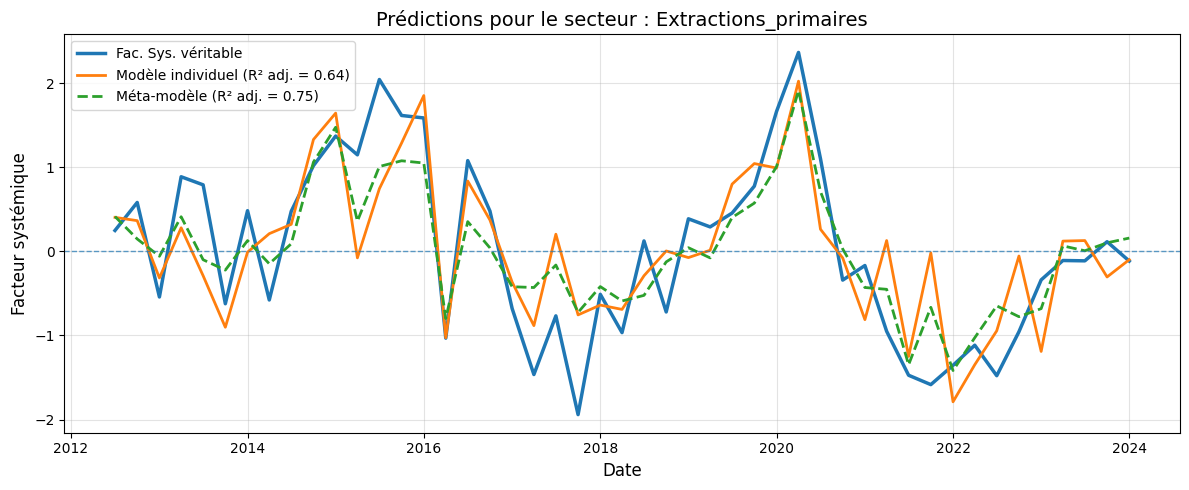

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_predictions_like_example(
    df,
    date_col="date",          # colonne date (datetime ou convertible)
    y_true_col="y_true",      # facteur systémique "véritable"
    y_indiv_col="y_indiv",    # prédiction d'un modèle individuel
    y_meta_col="y_meta",      # prédiction du méta-modèle (stacking/JMA)
    sector_name="Extractions_primaires",
    r2_indiv=None,            # si None -> calculé
    r2_meta=None,             # si None -> calculé
    title_prefix="Prédictions pour le secteur : ",
    figsize=(12, 5),
    savepath=None
):
    """
    Reproduit un graphe proche de ton exemple:
    - noir: y_true
    - bleu: y_indiv
    - rouge pointillé: y_meta
    - ligne horizontale y=0 en gris pointillé
    - légende avec R² adj (ici on met R² simple; si tu veux l'ajusté, passe-le via r2_*)

    df doit contenir au minimum: date_col, y_true_col, y_indiv_col, y_meta_col.
    """
    d = df[[date_col, y_true_col, y_indiv_col, y_meta_col]].copy()
    d[date_col] = pd.to_datetime(d[date_col], errors="coerce")
    d = d.dropna().sort_values(date_col)

    y_true = d[y_true_col].astype(float).values
    y_ind  = d[y_indiv_col].astype(float).values
    y_meta = d[y_meta_col].astype(float).values

    def r2(y, yhat):
        if len(y) < 2:
            return np.nan
        sse = np.sum((y - yhat) ** 2)
        sst = np.sum((y - np.mean(y)) ** 2)
        return np.nan if sst == 0 else 1 - sse / sst

    if r2_indiv is None:
        r2_indiv = r2(y_true, y_ind)
    if r2_meta is None:
        r2_meta = r2(y_true, y_meta)

    plt.figure(figsize=figsize)
    plt.plot(d[date_col], y_true, linewidth=2.5, label="Fac. Sys. véritable")
    plt.plot(d[date_col], y_ind,  linewidth=2.0, label=f"Modèle individuel (R² adj. = {r2_indiv:.2f})")
    plt.plot(d[date_col], y_meta, linewidth=2.0, linestyle="--",
             label=f"Méta-modèle (R² adj. = {r2_meta:.2f})")

    plt.axhline(0, linestyle="--", linewidth=1.0, alpha=0.7)
    plt.grid(True, alpha=0.35)

    plt.title(f"{title_prefix}{sector_name}", fontsize=14)
    plt.ylabel("Facteur systémique", fontsize=12)
    plt.xlabel("Date", fontsize=12)
    plt.legend(loc="upper left", frameon=True)

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=200, bbox_inches="tight")
    plt.show()


# ==========================
# EXEMPLE D’UTILISATION
# ==========================
# Tu peux construire df_plot à partir de tes objets:
# - Z observé : df_macro_stationary["Z_..."]
# - prédiction modèle individuel : yhat_best (Series)
# - prédiction méta-modèle : yhat_stacked (Series)

# Exemple type (adapte les noms):
y_col = y_col  # ou "Z_EXTRACTIONS_PRIMAIRES"
y_true = df_macro_stationary[y_col]
yhat_indiv =y_indiv_col           # Series indexée par date
yhat_meta = y_meta_col   # Series indexée par date
#
df_plot = pd.concat(
    [y_true.rename("y_true"),
     yhat_indiv.rename("y_indiv"),
     yhat_meta.rename("y_meta")],
    axis=1
).reset_index().rename(columns={"index": "date"})
#
plot_predictions_like_example(
    df_plot,
    date_col="date",
    y_true_col="y_true",
    y_indiv_col="y_indiv",
    y_meta_col="y_meta",
    sector_name="Extractions_primaires"
 )
